In [1]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
# Pytorch Pipeline

# 1) Design MOdel (input,output, forward Pass)
# 2) Construct Loss and Optimizer
# 3) Training loop
#    - forward pass : computer prediction
#    - backward pass : gradients
#    - update weights

epoch : 10, loss = 4314.7388
epoch : 20, loss = 3221.2341
epoch : 30, loss = 2429.8416
epoch : 40, loss = 1856.4932
epoch : 50, loss = 1440.7089
epoch : 60, loss = 1138.9170
epoch : 70, loss = 919.6841
epoch : 80, loss = 760.3027
epoch : 90, loss = 644.3518
epoch : 100, loss = 559.9428


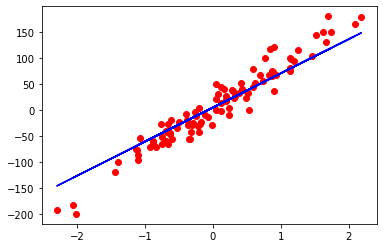

In [11]:
# prepare data
x_numpy, y_numpy = datasets.make_regression(n_samples = 100 , n_features = 1, noise =20, random_state =1)
X = torch.from_numpy(x_numpy.astype(np.float32))
Y = torch.from_numpy(y_numpy.astype(np.float32))

Y = Y.view(Y.shape[0],1)
n_samples , n_features = X.shape

# model
input_size = n_features
output_size = 1
learning_rate = 0.01
model = nn.Linear(input_size, output_size)

# loss 
criterion = nn.MSELoss()

# optimizer
optimizer = torch.optim.SGD(model.parameters(), lr =learning_rate)

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    # forward pass
    y_pred = model(X)
    loss = criterion(y_pred, Y)
    
    # backward pass
    loss.backward()
    
    #update
    optimizer.step()
    
    #empty weights
    optimizer.zero_grad()
    
    if (epoch+1) % 10 == 0:
        print(f'epoch : {epoch + 1}, loss = {loss.item():.4f}')


        
        
 #plot
predicted = model(X).detach().numpy()  # this is not required in computational graph
plt.plot(x_numpy, y_numpy , 'ro')
plt.plot(x_numpy , predicted , 'b')
plt.show()